In [61]:
#!conda install -y conda-forge::dlib

In [62]:
from pathlib import Path


path = str(Path().resolve())+"/Images/"

In [63]:
import cv2 as cv
import numpy as np

img = cv.imread(path+"Trump.jpg")
img = cv.resize(img,dsize=(400,500))
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mask = np.zeros_like(img_gray)

img2 = cv.imread(path+"TheRock.jpg")
img2 = cv.resize(img2,dsize=(400,500))
img2_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

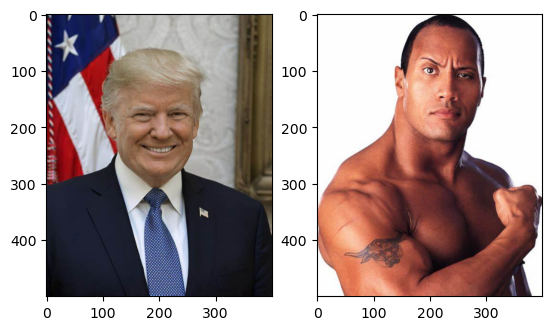

In [64]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
axs[1].imshow(img2)
mask

In [65]:
from mediapipe.python.solutions import drawing_utils as mp_drawing
import mediapipe.python.solutions.face_mesh as mp_faces
from mediapipe.python.solutions import drawing_styles
import data_set as dts

laps=0
listX=dts.TRIANGLE_SET
lista = [listX[i:i+3] for i in range(0, len(listX), 3)]
lista

[[(127, 34), (34, 139), (139, 127)],
 [(11, 0), (0, 37), (37, 11)],
 [(232, 231), (231, 120), (120, 232)],
 [(72, 37), (37, 39), (39, 72)],
 [(128, 121), (121, 47), (47, 128)],
 [(232, 121), (121, 128), (128, 232)],
 [(104, 69), (69, 67), (67, 104)],
 [(175, 171), (171, 148), (148, 175)],
 [(118, 50), (50, 101), (101, 118)],
 [(73, 39), (39, 40), (40, 73)],
 [(9, 151), (151, 108), (108, 9)],
 [(48, 115), (115, 131), (131, 48)],
 [(194, 204), (204, 211), (211, 194)],
 [(74, 40), (40, 185), (185, 74)],
 [(80, 42), (42, 183), (183, 80)],
 [(40, 92), (92, 186), (186, 40)],
 [(230, 229), (229, 118), (118, 230)],
 [(202, 212), (212, 214), (214, 202)],
 [(83, 18), (18, 17), (17, 83)],
 [(76, 61), (61, 146), (146, 76)],
 [(160, 29), (29, 30), (30, 160)],
 [(56, 157), (157, 173), (173, 56)],
 [(106, 204), (204, 194), (194, 106)],
 [(135, 214), (214, 192), (192, 135)],
 [(203, 165), (165, 98), (98, 203)],
 [(21, 71), (71, 68), (68, 21)],
 [(51, 45), (45, 4), (4, 51)],
 [(144, 24), (24, 23), (23,

Multiplicar X e Y por el ancho de la foto

In [66]:
from numpy import isin
import numpy as np

landmarkListImg1=[]
with mp_faces.FaceMesh() as faces:
    results = faces.process(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    for face_landmarks in results.multi_face_landmarks:
        landmarkListImg1 = [x for x in face_landmarks.landmark]

with mp_faces.FaceMesh() as faces:
    results = faces.process(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    for face_landmarks in results.multi_face_landmarks:
        landmarkListImg2 = [x for x in face_landmarks.landmark]

height, width = img.shape[:2]
img_m = img.copy()
triangulosImg1Marks={}
for valor in lista:
    for tupla in valor:
        x1,y1=landmarkListImg1[tupla[0]].x*width,landmarkListImg1[tupla[0]].y*height
        x2,y2=landmarkListImg1[tupla[1]].x*width,landmarkListImg1[tupla[1]].y*height
        cv.line(img_m, (int(x1),int(y1)), (int(x2),int(y2)), (255,0,0), 1)
        triangulosImg1Marks[tupla[0]]=[x1,y1]
        triangulosImg1Marks[tupla[0]]=[x2,y2]

height, width = img2.shape[:2]
img2_m = img2.copy()
triangulosImg2Marks={}
for valor in lista:
    for tupla in valor:
        x1,y1=landmarkListImg2[tupla[0]].x*width,landmarkListImg2[tupla[0]].y*height
        x2,y2=landmarkListImg2[tupla[1]].x*width,landmarkListImg2[tupla[1]].y*height
        cv.line(img2_m, (int(x1),int(y1)), (int(x2),int(y2)), 255)
        triangulosImg2Marks[tupla[0]]=[x1,y1]
        triangulosImg2Marks[tupla[0]]=[x2,y2]


libEGL warning: MESA-LOADER: failed to open nouveau: /usr/lib/dri/nouveau_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open nouveau: /usr/lib/dri/nouveau_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open nouveau: /usr/lib/dri/nouveau_dri.so: cannot ope

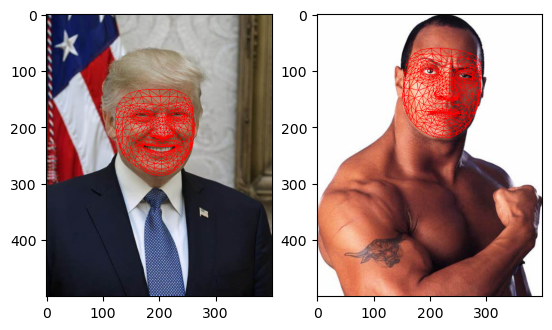

In [67]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(img_m)
axs[1].imshow(img2_m)

In [68]:
triangles=[]
for t in lista:
    pt1 = (t[0][0], t[0][1])
    pt2 = (t[1][0], t[1][1])
    pt3 = (t[2][0], t[2][1])
    value = list(set([pt1[0],pt1[1],pt2[0],pt2[1],pt3[0],pt3[1]]))
    triangles.append(value)
print(triangles)

[[34, 139, 127], [0, 11, 37], [232, 120, 231], [72, 37, 39], [128, 121, 47], [232, 121, 128], [104, 67, 69], [171, 148, 175], [50, 101, 118], [40, 73, 39], [9, 108, 151], [48, 115, 131], [194, 211, 204], [40, 185, 74], [80, 42, 183], [40, 186, 92], [118, 229, 230], [202, 212, 214], [17, 18, 83], [146, 76, 61], [160, 29, 30], [56, 157, 173], [194, 106, 204], [192, 214, 135], [98, 203, 165], [68, 21, 71], [51, 4, 45], [144, 24, 23], [146, 91, 77], [50, 187, 205], [200, 201, 18], [106, 91, 182], [90, 91, 181], [17, 84, 85], [203, 36, 206], [140, 171, 148], [40, 92, 39], [193, 244, 189], [28, 158, 159], [161, 246, 247], [196, 3, 236], [104, 68, 54], [168, 193, 8], [228, 117, 31], [193, 189, 55], [97, 98, 99], [100, 126, 47], [218, 166, 79], [26, 154, 155], [209, 131, 49], [136, 150, 135], [217, 126, 47], [52, 53, 223], [51, 45, 134], [170, 211, 140], [67, 108, 69], [91, 106, 43], [120, 230, 119], [226, 247, 130], [52, 53, 63], [242, 20, 238], [70, 156, 46], [62, 96, 78], [53, 46, 63], [34,

In [69]:
def imagen_mask(imagen,landmask):
    imagen_final = np.zeros(imagen.shape, dtype=np.uint8)
    
    for triangulo in triangles:
        puntos = [landmask[punto] for punto in triangulo if punto in landmask]
        if len(puntos) == 3:
            # Crea una máscara con el mismo tamaño que la imagen
            mascara = np.zeros(imagen.shape, dtype=np.uint8)
    
            # Dibuja el triángulo en la máscara
            cv.drawContours(mascara, [np.array(puntos, dtype=np.int32)], -1, (255, 255, 255), -1)
    
            # Aplica la máscara a la imagen
            triangulo_extraido = cv.bitwise_and(imagen, mascara)
    
            # Añade el triángulo extraído a la imagen final
            imagen_final = cv.bitwise_or(imagen_final, triangulo_extraido)
    return imagen_final

In [70]:
img_mask=imagen_mask(img,triangulosImg1Marks)
img2_mask=imagen_mask(img2,triangulosImg2Marks)

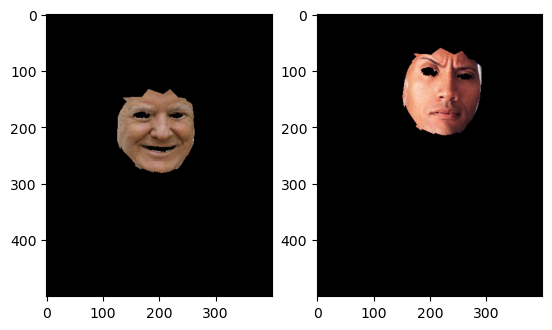

In [71]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(img_mask)
axs[1].imshow(img2_mask)

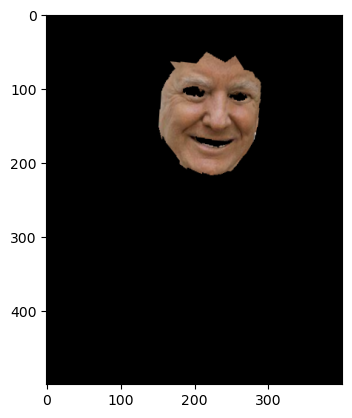

In [72]:
# Convertir los diccionarios de puntos a matrices numpy de puntos flotantes
puntos1 = np.array([list(punto) for punto in triangulosImg1Marks.values()], dtype=np.float32)
puntos2 = np.array([list(punto) for punto in triangulosImg2Marks.values()], dtype=np.float32)

# Encuentra la transformación de homografía entre los puntos de los triángulos de las dos imágenes
H, _ = cv.findHomography(puntos1, puntos2)

# Aplica la transformación de homografía a la máscara de la cara de la primera imagen
img_mask_alineada = cv.warpPerspective(img_mask, H, (img2_mask.shape[1], img2_mask.shape[0]))
plt.imshow(img_mask_alineada)

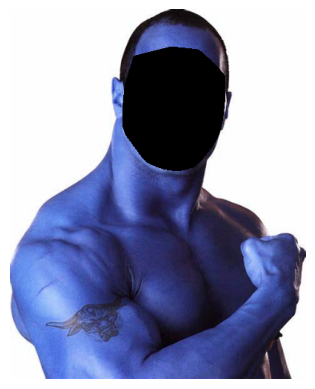

In [76]:
import cv2 as cv
import numpy as np

# Convertir la imagen a escala de grises si es necesario
img_mask_alineada_gray = cv.cvtColor(img_mask_alineada, cv.COLOR_BGR2GRAY)

# Calcula el contorno convexo de la máscara de la cara
contours, _ = cv.findContours(img_mask_alineada_gray, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
convexhull2 = cv.convexHull(contours[0])

# Crea una máscara para la cara
# (aquí deberías continuar con el código para crear la máscara)


# Crea una máscara para la cara
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv.bitwise_not(img2_head_mask)

# Aplica la máscara a la imagen
img2_head_noface = cv.bitwise_and(img2, img2, mask=img2_face_mask)

# Visualiza el resultado
plt.imshow(cv.cvtColor(img2_head_noface, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# V 1

In [ ]:
import cv2
import numpy as np
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh

img = cv2.imread(path + "Trump.jpg")
img2 = cv2.imread(path + "TheRock.jpg")

# Configura la detección facial de MediaPipe
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:

    # Procesa la imagen 1
    results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks_points = [(int(landmark.x * img.shape[1]), int(landmark.y * img.shape[0])) for landmark in face_landmarks.landmark]

# Procesa la imagen 2
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:
    results = face_mesh.process(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks_points2 = [(int(landmark.x * img2.shape[1]), int(landmark.y * img2.shape[0])) for landmark in face_landmarks.landmark]

libEGL warning: MESA-LOADER: failed to open nouveau: /usr/lib/dri/nouveau_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open nouveau: /usr/lib/dri/nouveau_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open nouveau: /usr/lib/dri/nouveau_dri.so: cannot ope

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
lines_space_mask = np.zeros_like(img_gray)
lines_space_new_face = np.zeros_like(img2)
img2_new_face = np.zeros_like(img2)
convexhull2 = cv2.convexHull(np.array(landmarks_points2, np.int32))

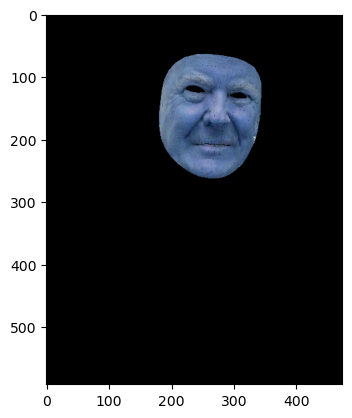

In [ ]:
for triangle_index in triangles:
    # Triangulación de la primera cara
    tr1_pts = [landmarks_points[idx] for idx in triangle_index]
    triangle1 = np.array(tr1_pts, np.int32)

    rect1 = cv2.boundingRect(triangle1)
    x, y, w, h = rect1
    cropped_triangle = img[y:y + h, x:x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)

    points = np.array([[pt[0] - x, pt[1] - y] for pt in tr1_pts], np.int32)
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)

plt.imshow(cv2.cvtColor(seamlessclone,cv2.COLOR_BGR2RGB))
    points2 = np.array([[pt[0] - x, pt[1] - y] for pt in tr2_pts], np.int32)
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

    img2_new_face_rect_area = img2_new_face[y:y + h, x:x + w]
    _, mask_triangles_designed = cv2.threshold(cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face[y:y + h, x:x + w] = cv2.add(img2_new_face_rect_area, warped_triangle)

plt.imshow(img2_new_face)


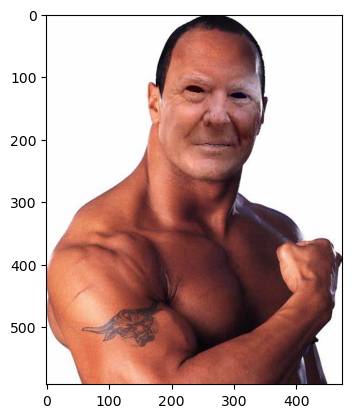

In [ ]:
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)

img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
result = cv2.add(img2_head_noface, img2_new_face)

(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)

plt.imshow(cv2.cvtColor(seamlessclone,cv2.COLOR_BGR2RGB))